In [2]:
# import numpy as np

# # Define amino acid order used in MUSCLE matrices
# amino_acids = list("ARNDCQEGHILKMFPSTWYV")

# # Define scores
# match_score = 1000       # identical residues
# mismatch_score = -999 # mismatched residues

# # Create matrix
# n = len(amino_acids)
# matrix = np.full((n, n), mismatch_score, dtype=int)
# np.fill_diagonal(matrix, match_score)

# # Write to file with MUSCLE's expected tab-separated format
# with open("Fasta_files/identity.mat", "w") as f:
#     f.write("# Custom identity-only substitution matrix for MUSCLE\n")
#     f.write("\t" + "\t".join(amino_acids) + "\n")  # TAB before AAs

#     for i, aa in enumerate(amino_acids):
#         row_scores = "\t".join(str(score) for score in matrix[i])
#         f.write(f"{aa}\t{row_scores}\n")

# print("identity.mat created successfully (tab-formatted for MUSCLE).")

In [3]:
with open("D:/Masters_Data/Project-GPCR/Fasta_files/identity.mat", "r", encoding="ascii") as f:
    header = f.readline().strip().split("\t")
print(len(header), header)

1 ['# Custom identity-only substitution matrix for MUSCLE']


In [ ]:
from compute_contacts import compute_af3_contacts
#compute contacts in every complex
NEFL_distances = compute_af3_contacts("D:/Masters_Data/Project-GPCR/AF3_server/NEFL_output",dist=3.5)
FAM64A_distances = compute_af3_contacts("D:/Masters_Data/project-GPCR/AF3_server/FAM64A_output",dist=3.5)
UPP2_distances = compute_af3_contacts("D:/Masters_Data/project-GPCR/AF3_server/UPP2_output",dist=3.5)
s100b_distances = compute_af3_contacts("D:/Masters_Data/project-GPCR/AF3_server/S100B_output",dist=3.5)

In [5]:
import pandas as pd

sequence_df=pd.read_csv("Data/All_nucleotides_aa.csv")

new_sequences=pd.concat([pd.read_csv("Data/UPP_necessaryv2.csv"),pd.read_csv("Data/S100B_necessaryv2.csv")])
sequence_df=pd.concat([sequence_df,new_sequences])


In [6]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO
import skbio
from skbio.alignment import global_pairwise_align_protein


def muscle_alignment_fasta(df_sequences , Gene_Symbol):
    """Create alignment from isoforms
    collumn names of the dataframe should be "Gene_Symbol"  and  "aa_seq" """

    df=df_sequences[df_sequences["Gene_Symbol"]==Gene_Symbol]
    seqs=[]
    for i in range(len(df)):
        seqs.append(skbio.Protein((df["aa_seq"].iloc[i].rstrip("*")),metadata={"id":f"iso{i+1}"}))
    
    records = [
    SeqRecord(Seq(seq.rstrip("*")), id=id_)  # remove trailing *
    for seq, id_ in zip(df["aa_seq"], df["Isoform_ID"])
    ]
    
    SeqIO.write(records, f"Fasta_files/{Gene_Symbol}.fasta", "fasta")
    return df
    

muscle_alignment_fasta(sequence_df,"UPP2")
# muscle_alignment_fasta(sequence_df,"UPP2")

# # muscle_alignment_fasta(sequence_df,"FAM64A")
# muscle_alignment_fasta(sequence_df,"NEFL")


,Gene_Symbol,Isoform_ID,ORF_sequence,aa_seq,ORF
0,UPP2,UPP2_1,NaN,MASVIPASNRSMRSDRNTYVGKRFVHVKNPYLDLMDEDILYHLDLG...,ATGGCTTCAGTTATACCTGCCTCCAATAGGTCCATGAGATCTGACA...
1,UPP2,UPP2_2,NaN,MASVIPASNRSMRSDRNTYVGKRFVHVKNPYLDLMDEDILYHLDLG...,ATGGCTTCAGTTATACCTGCCTCCAATAGGTCCATGAGATCTGACA...
2,UPP2,UPP2_3,NaN,MASVIPASNRSMRSDRNTYVGKRFVHVKNPYLDLMDEDILYHLDLG...,ATGGCTTCAGTTATACCTGCCTCCAATAGGTCCATGAGATCTGACA...
3,UPP2,UPP2_4,NaN,MASVIPASNRSMRSDRNTYVGKRFVHVKNPYLDLMDEDILYHLDLG...,ATGGCTTCAGTTATACCTGCCTCCAATAGGTCCATGAGATCTGACA...
7,UPP2,UPP2_1,NaN,MASVIPASNRSMRSDRNTYVGKRFVHVKNPYLDLMDEDILYHLDLG...,ATGGCTTCAGTTATACCTGCCTCCAATAGGTCCATGAGATCTGACA...


Run Alignment on subprocess

here, because its a subprocess I will do each job one by one

In [7]:
import subprocess
import os

# Define paths (using raw strings for Windows compatibility)
muscle_exe = r"D:/Masters_Data/software/muscle/musclev3.exe"
input_fasta = r"D:/Masters_Data/Project-GPCR/Fasta_files/UPP2.fasta"
output_aln = r"D:/Masters_Data/Project-GPCR/Fasta_files/UPP2v3.aln"
matrix = r"D:/Masters_Data/Project-GPCR/Fasta_files/identity.mat"


# Verify that input file and executable exist
if not os.path.exists(muscle_exe):
    raise FileNotFoundError(f"MUSCLE executable not found at: {muscle_exe}")
if not os.path.exists(input_fasta):
    raise FileNotFoundError(f"Input FASTA file not found at: {input_fasta}")

# Construct the MUSCLE 5.3 command

command = f'"{muscle_exe}" -in "{input_fasta}" -out "{output_aln}" -matrix "{matrix}" '
print(command)
# Run the command
try:
    process = subprocess.run(
        command,
        shell=True,
        capture_output=True,
        text=False,
        check=True  # Raise an error if MUSCLE fails
    )
    print("STDOUT:")
    print(process.stdout)
    print("STDERR:")
    print(process.stderr)
    print(f"Return code: {process.returncode}")
except subprocess.CalledProcessError as e:
    print(f"Error running MUSCLE: {e}")
    print("STDOUT:")
    print(e.stdout)
    print("STDERR:")
    print(e.stderr)
except Exception as e:
    print(f"Unexpected error: {e}")

"D:/Masters_Data/software/muscle/musclev3.exe" -in "D:/Masters_Data/Project-GPCR/Fasta_files/UPP2.fasta" -out "D:/Masters_Data/Project-GPCR/Fasta_files/UPP2v3.aln" -matrix "D:/Masters_Data/Project-GPCR/Fasta_files/identity.mat" 
STDOUT:
b''
STDERR:
b'\r\nMUSCLE v3.8.31 by Robert C. Edgar\r\n\r\nhttp://www.drive5.com/muscle\r\nThis software is donated to the public domain.\r\nPlease cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.\r\n\r\n\r\n*** WARNING *** Matrix is not symmetrical, \xff->\xff=-999, \xff->\xff=0\r\nUPP2 5 seqs, max length 317, avg  length 248\r\n00:00:00      7 MB(1%)  Iter   1    6.67%  K-mer dist pass 1\r00:00:00      7 MB(1%)  Iter   1  100.00%  K-mer dist pass 1\r\r\n00:00:00      7 MB(1%)  Iter   1    6.67%  K-mer dist pass 2\r00:00:00      7 MB(1%)  Iter   1  100.00%  K-mer dist pass 2\r\r\n00:00:00      7 MB(1%)  Iter   1   25.00%  Align node       \r00:00:00     10 MB(1%)  Iter   1   50.00%  Align node\r00:00:00     10 MB(1%)  Iter   1   75.00%  Align node\r

Convert .aln file to dataframe with unaligned positions as values

In [141]:
from Bio import AlignIO
import pandas as pd
import os

# Define the path to the alignment file
aln_file = r"Fasta_files/FAM64A.aln"



try:
    alignment = AlignIO.read(aln_file, "fasta")
except Exception as e:
    print(f"Error reading alignment: {e}")
    raise

# Create a mapping of alignment positions to unaligned sequence positions
def map_alignment_to_unaligned(alignment):
    pos_mapping = {}
    for record in alignment:
        seq_id = record.id
        seq = str(record.seq)
        unaligned_pos = 0  # Tracks position in unaligned sequence
        mapping = []
        for aa in seq:
            if aa != "-":
                unaligned_pos += 1
                mapping.append(unaligned_pos)
            else:
                mapping.append("-")  # Use "-" for gaps
        pos_mapping[seq_id] = mapping
    return pos_mapping

# Generate mapping
pos_mapping = map_alignment_to_unaligned(alignment)

# Create DataFrame
columns = [i+1 for i in range(alignment.get_alignment_length())]
df = pd.DataFrame(pos_mapping).T  # Transpose so sequences are rows
df.columns = columns

In [142]:
import numpy as np

results={}
for i , j  in FAM64A_distances.items():
    #choose isoform
    
    for k in df.index:#isoform names
        contact_vec=np.zeros(df.shape[1])-1
        if str(k).lower() in i:#if the position matrix is in the dictionary then apend the values
            
            for contacts in j:
                #access with MSA value
                protein_pos=int(contacts[0][0][3:])

                rows = (df.loc[k][df.loc[k] == protein_pos]).index#check which value in df[k] is equal to the protein position and get that index
                
                contact_vec[rows-1] = 1  # here contacts has the following format (('LEU43', 'LEU246'), 6.65606) so we want to extract 43 and the 3 letters are always there so we can do the following
        else:
            continue
        results[i] = contact_vec  
          


Put 0 in the "-" regions of the MSA

In [143]:
df_results = pd.DataFrame.from_dict(results, orient="index")

for i in df_results.index:
    first_part = "_".join(i.split("_")[:2])#check only the gene and not the interactor. Important in UPP2 because we use UPP2_1 as a interactor itself
    
    for j in range(np.shape(df_results)[1]):
        for k in df.index:
            
            if k.lower() in first_part:
                
                gap_columns = df.loc[k][df.loc[k] == "-"].index  # Get column names where df has gaps
                df_results.loc[i, gap_columns] = 0

In [144]:
df_results

,0,1,2,3,4,5,6,7,8,9,...,238,239,240,241,242,243,244,245,246,247
fam64a_1_agtrap,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
fam64a_1_bend5,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
fam64a_1_ccndbp1,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
fam64a_1_cep70,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
fam64a_1_cmtm5,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
fam64a_1_dock8,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
fam64a_1_golga2_orf2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
fam64a_1_hook2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
fam64a_1_krt40,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
fam64a_1_mal2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [145]:
# NEFL_labels=pd.read_csv("Data/NEFL_ppi_fam-trim.csv")
# NEFL_labels["complex_id"] = (NEFL_labels["Isoform_ID"].astype(str)+ "_" + NEFL_labels["Interactor_ID"].astype(str)).str.lower()
# NEFL_labels
# df_results2 = df_results.merge(
#     NEFL_labels.set_index("complex_id")[["Interaction_Found"]],
#     left_index=True,
#     right_index=True,
#     how="left"
# )

# s100b_labels=pd.read_csv("Data/S100B.trim.csv")
# s100b_labels["complex_id"] = (s100b_labels["Isoform_ID"].astype(str)+ "_" + s100b_labels["Interactor_ID"].astype(str)).str.lower()

# df_results2 = df_results.merge(
#     s100b_labels.set_index("complex_id")[["Interaction_Found"]],
#     left_index=True,
#     right_index=True,
#     how="left"
# )



In [146]:
FAM64A_labels=pd.read_csv("Data\ppi_fam-trim.csv")
FAM64A_labels["complex_id"] = (FAM64A_labels["Isoform_ID"].astype(str)+ "_" + FAM64A_labels["Interactor_ID"].astype(str)).str.lower()

df_results2 = df_results.merge(
    FAM64A_labels.set_index("complex_id")[["Interaction_Found"]],
    left_index=True,
    right_index=True,
    how="left"
)

# UPP2_labels=pd.read_csv("Data/UPP2.trim.csv")
# UPP2_labels["complex_id"] = (UPP2_labels["Isoform_ID"].astype(str)+ "_" + UPP2_labels["Interactor_ID"].astype(str)).str.lower()

# df_results2 = df_results.merge(
#     UPP2_labels.set_index("complex_id")[["Interaction_Found"]],
#     left_index=True,
#     right_index=True,
#     how="left"
# )



In [147]:
df_results2

,0,1,2,3,4,5,6,7,8,9,...,239,240,241,242,243,244,245,246,247,Interaction_Found
fam64a_1_agtrap,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,negative
fam64a_1_bend5,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,negative
fam64a_1_ccndbp1,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,negative
fam64a_1_cep70,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,negative
fam64a_1_cmtm5,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,negative
fam64a_1_dock8,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,negative
fam64a_1_golga2_orf2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,negative
fam64a_1_hook2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,negative
fam64a_1_krt40,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,negative
fam64a_1_mal2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,negative


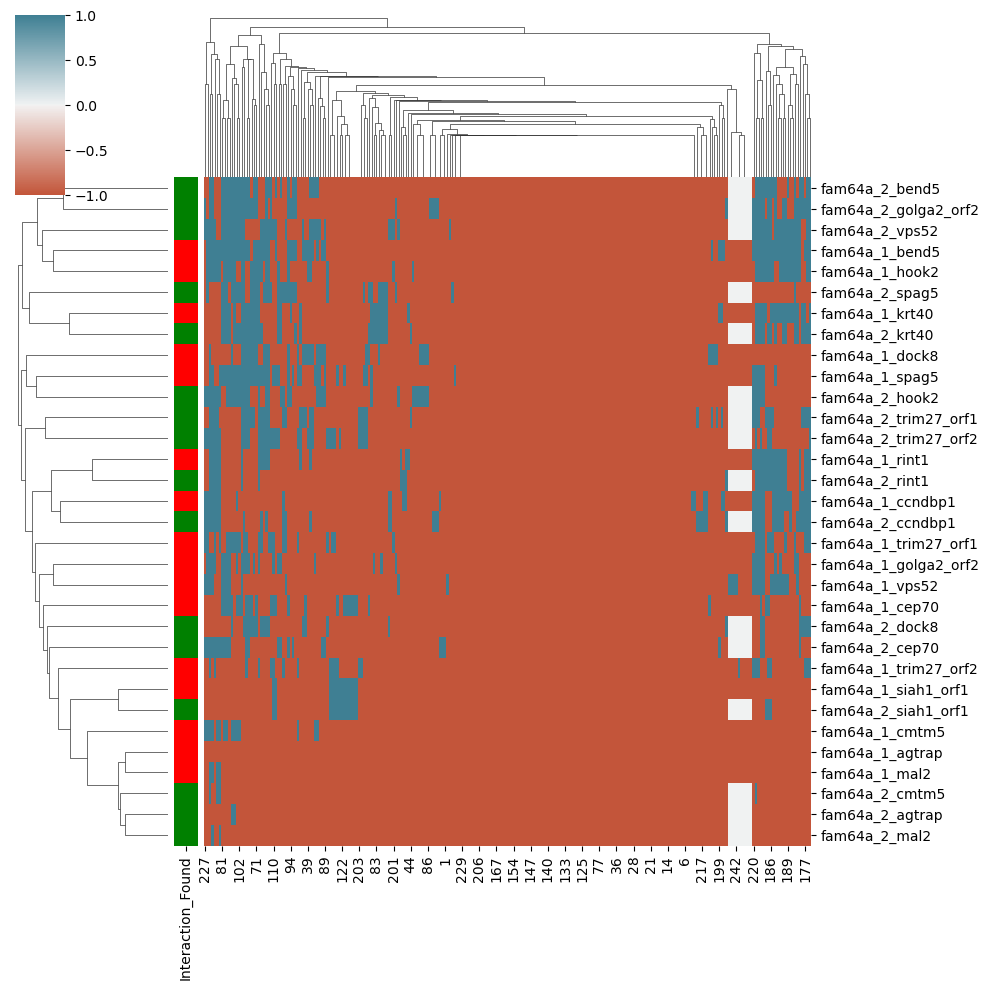

In [148]:
import seaborn as sns

df_results2=df_results2.fillna(0)
# labels = df_results.index           
names = df_results2.index 
labels = df_results2["Interaction_Found"]

# set index first


# make row_colors indexed the same way
lut = {"negative": "red", "positive": "green"}
row_colors = labels.map(lut)
row_colors.index = names   # ensure alignment

# plot

sns.clustermap(df_results2.drop(columns="Interaction_Found"),row_colors=row_colors, cmap=sns.diverging_palette(20, 220, as_cmap=True))

In [149]:
df_results2

,0,1,2,3,4,5,6,7,8,9,...,239,240,241,242,243,244,245,246,247,Interaction_Found
fam64a_1_agtrap,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,negative
fam64a_1_bend5,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,negative
fam64a_1_ccndbp1,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,negative
fam64a_1_cep70,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,negative
fam64a_1_cmtm5,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,negative
fam64a_1_dock8,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,negative
fam64a_1_golga2_orf2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,negative
fam64a_1_hook2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,negative
fam64a_1_krt40,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,negative
fam64a_1_mal2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,negative


Unique Interaction_Found values: ['negative' 'positive']
DataFrame shape after dropna: (32, 249)
Row colors length: 32
Data to plot shape: (32, 248)


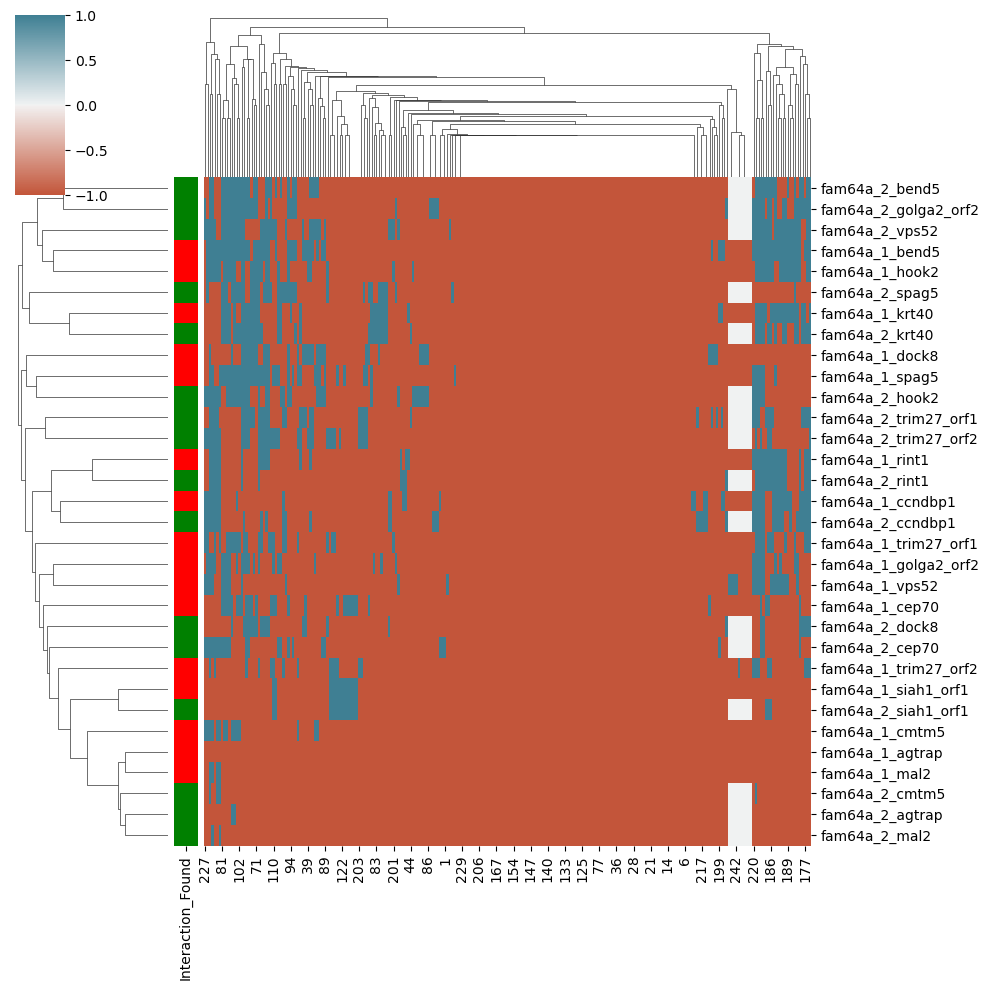

In [150]:
import seaborn as sns
import pandas as pd

# Drop rows with missing values (only where needed)
df_results2 = df_results2.dropna(subset=["Interaction_Found"])

# Check contents
print("Unique Interaction_Found values:", df_results2["Interaction_Found"].unique())
print("DataFrame shape after dropna:", df_results2.shape)

# Create color mapping
lut = {"negative": "red", "positive": "green"}

# Map labels safely
labels = df_results2["Interaction_Found"].map(lut)

# Remove any rows with unmapped labels (to avoid NaN in row_colors)
valid_rows = labels.dropna().index
df_plot = df_results2.loc[valid_rows].drop(columns="Interaction_Found")
row_colors = labels.loc[valid_rows]

# Check that everything aligns
print("Row colors length:", len(row_colors))
print("Data to plot shape:", df_plot.shape)

# Plot
sns.clustermap(
    df_plot,
    row_colors=row_colors,
    cmap=sns.diverging_palette(20, 220, as_cmap=True)
)



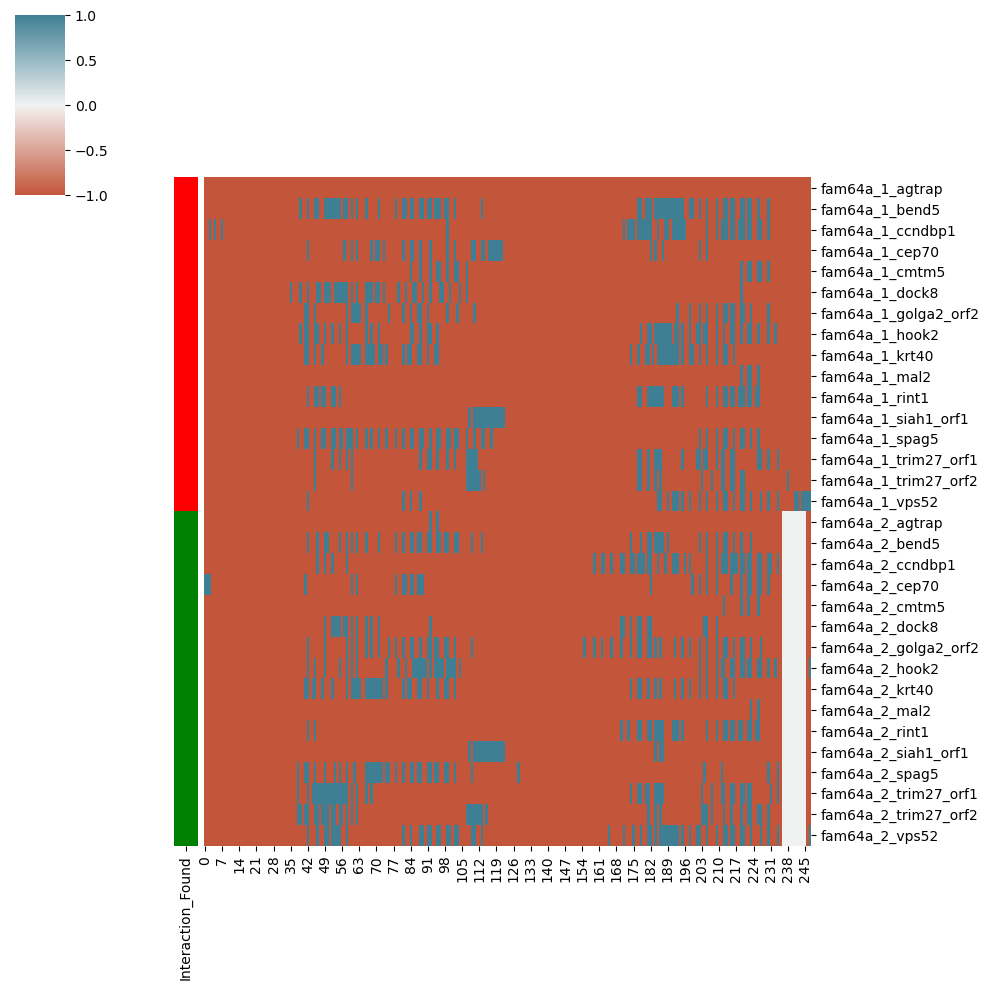

In [151]:
import seaborn as sns


# df_results = df_results2.sort_values(
#     by=df_results2.index.str.split("_")[-1]
# )

lut = {"negative": "red", "positive": "green"}
row_colors = df_results2["Interaction_Found"].map(lut)  # recalc AFTER sorting

sns.clustermap(
    df_results2.drop(columns="Interaction_Found"),
    cmap=sns.diverging_palette(20, 220, as_cmap=True),
    row_colors=row_colors,
    col_cluster=False,
    row_cluster=False
)

In [156]:
df_results2

,0,1,2,3,4,5,6,7,8,9,...,239,240,241,242,243,244,245,246,247,Interaction_Found
fam64a_1_agtrap,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,negative
fam64a_1_bend5,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,negative
fam64a_1_ccndbp1,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,negative
fam64a_1_cep70,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,negative
fam64a_1_cmtm5,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,negative
fam64a_1_dock8,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,negative
fam64a_1_golga2_orf2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,negative
fam64a_1_hook2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,negative
fam64a_1_krt40,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,negative
fam64a_1_mal2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,negative


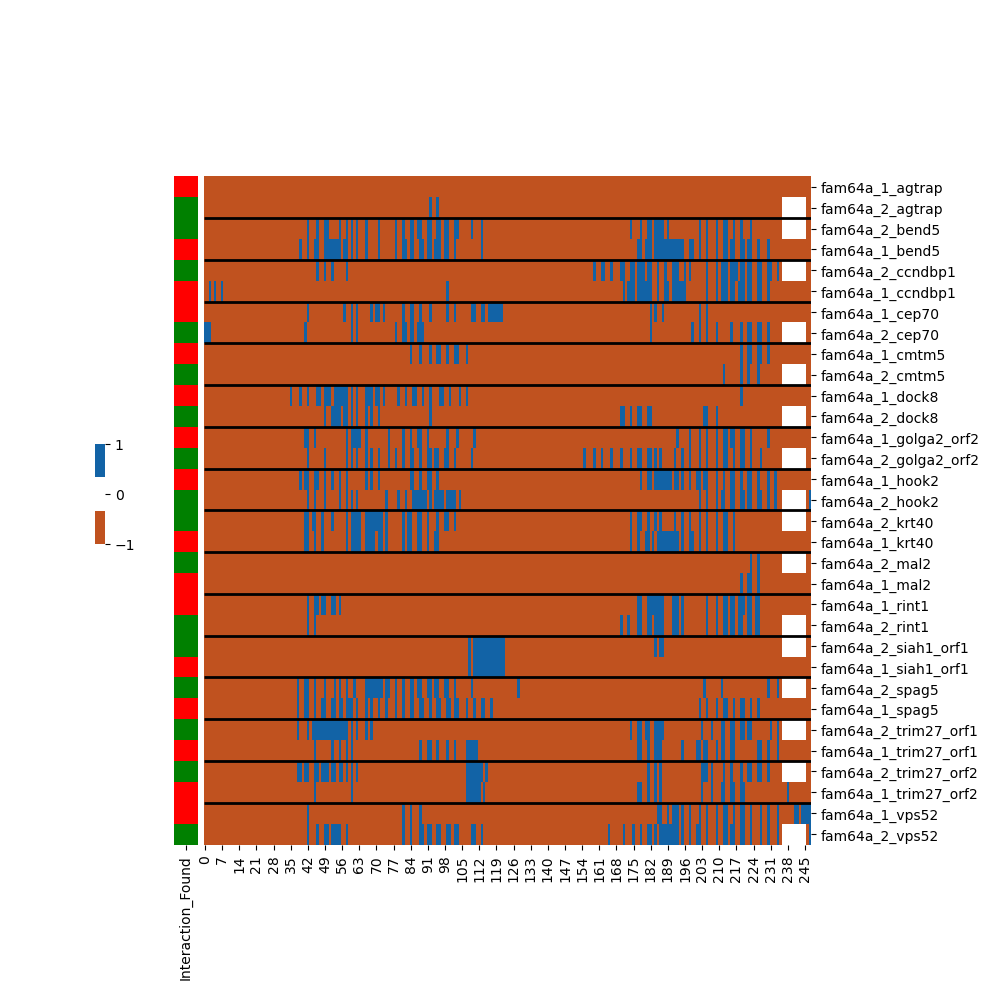

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Sort by the suffix after the last underscore in the row index
df_results3 = df_results2.sort_index(
    key=lambda idx: idx.str.split("_").str[2:].str.join("_")
)

df_results3.loc[df_results3["Interaction_Found"]==0 ,:] = 0 

# Define colors for Interaction_Found
lut = {"negative": "red", "positive": "green"}
row_colors = df_results2["Interaction_Found"].map(lut)

# Define discrete colormap and normalization
colors = ["#C0521F", "#ffffff", "#1263a6"]  
cmap = ListedColormap(colors)


g = sns.clustermap(
    df_results3.drop(columns="Interaction_Found"),
    cmap=cmap,
    # cmap=sns.diverging_palette(20, 220, as_cmap=True),
    row_colors=row_colors,
    col_cluster=False,
    row_cluster=False,

    cbar_pos=(0.1, 0.45, 0.01, 0.1)
)

# Add horizontal lines every 4 rows
for y in range(2, df_results2.shape[0], 2):
    g.ax_heatmap.hlines(y, *g.ax_heatmap.get_xlim(), color="black", lw=2)

plt.show()